## Date Manipulation with Orders Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#read the Orders CSV file
ordersdf = pd.read_csv("Orders.Data.csv")

#print out the basic info
print(ordersdf.shape)
print(ordersdf.dtypes)

(99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [3]:
#there are different dates regarding the ordering and delivery of a product
#what if I want to find out the average timespan between order and delivery?
ordersdf.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [4]:
#all dates are objects so we have to convert them to datetime objects
#lets change the column names first
ordersdf = ordersdf.rename(columns = {"order_purchase_timestamp": "Purchased_At",
                         "order_approved_at":"Approved_At",
                         "order_delivered_carrier_date": "Delivered_to_Carrier_On",
                         "order_delivered_customer_date": "Delivered_to_Customer_On",
                         "order_estimated_delivery_date": "Estimated_Delivery_On"}) 
ordersdf.head(10)


,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [5]:
#lets have only the relevant columns for the time being
ordersdf = ordersdf[['Purchased_At', 'Approved_At', 'Delivered_to_Carrier_On', 'Delivered_to_Customer_On', 'Estimated_Delivery_On']]
ordersdf.head(10)

,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [6]:
#lets typecast to datetime
ordersdf['Purchased_At'] = pd.to_datetime(ordersdf['Purchased_At'])
ordersdf['Approved_At'] = pd.to_datetime(ordersdf['Approved_At'])
ordersdf['Delivered_to_Carrier_On'] = pd.to_datetime(ordersdf['Delivered_to_Carrier_On'])
ordersdf['Delivered_to_Customer_On'] = pd.to_datetime(ordersdf['Delivered_to_Customer_On'])
ordersdf['Estimated_Delivery_On'] = pd.to_datetime(ordersdf['Estimated_Delivery_On'])
ordersdf.dtypes

Purchased_At                datetime64[ns]
Approved_At                 datetime64[ns]
Delivered_to_Carrier_On     datetime64[ns]
Delivered_to_Customer_On    datetime64[ns]
Estimated_Delivery_On       datetime64[ns]
dtype: object

In [7]:
#lets see some rows
ordersdf.head(10)

,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [8]:
#what is the average difference between order time and approval time
between_order_approval = ordersdf['Approved_At'] - ordersdf['Purchased_At']

In [9]:
between_order_approval.apply(lambda x: (x.total_seconds())/3600).mean()

#whoa... 10 hours is the average time between order and approval.. this seems a bit too much
#we will dig this later

10.419094301919714

In [10]:
#what is the average difference between expected delivery time and actual customer delivery time
#assuming that the orders are being delivered later than the estimated date....
between_estimated_actual = ordersdf['Delivered_to_Customer_On']-ordersdf['Estimated_Delivery_On']
between_estimated_actual.apply(lambda x: (x.total_seconds())/3600).mean()

#so, -268 hours means that the orders are being delivered 268 hours (or 11 days before, on the average)
#this also seems too good; we need to drill down (or maybe taking averages in this way is not the best analysis)

-268.2988771156704

In [11]:
#what is the average difference between approval and actual delivery
#assuming that the orders are being delivered later than the estimated date....
between_approved_actual = ordersdf['Delivered_to_Customer_On']-ordersdf['Approved_At']
between_approved_actual.apply(lambda x: (x.total_seconds())/3600).mean()

#so it takes 291 hours or 12 days on the average from approval to delivery. this seems reasonable.

291.12857102624093

In [12]:
#let's see the figures between order and approval
timediffseries = between_order_approval.apply(lambda x: (x.total_seconds())/3600)
timediffseries

0         0.178333
1        30.713889
2         0.276111
3         0.298056
4         1.030556
           ...    
99436     0.000000
99437     0.194167
99438     0.292500
99439     0.131667
99440    14.382778
Length: 99441, dtype: float64

In [13]:
newdf = pd.DataFrame(timediffseries,index = np.arange(len(timediffseries)),columns=['TimeDiff'])

In [14]:
newdf.head(100)

,TimeDiff
0,0.178333
1,30.713889
2,0.276111
3,0.298056
4,1.030556
...,...
95,0.532500
96,0.280833
97,0.241111
98,0.243056


In [15]:
print(newdf.shape)
print(newdf.mean())

#the following shows that in 30% rows, time difference is greater than 5 minutes
print((((newdf.where(newdf['TimeDiff']>5).count())/99441)*100))

#the following shows that in 28% rows, time difference is greater than 10 minutes
print((((newdf.where(newdf['TimeDiff']>10).count())/99441)*100))

#the following shows that in 5% rows, time difference is greater than 50 minutes
print((((newdf.where(newdf['TimeDiff']>50).count())/99441)*100))

#the following shows that in 1% rows, time difference is greater than 90 minutes
print((((newdf.where(newdf['TimeDiff']>90).count())/99441)*100))



(99441, 1)
TimeDiff    10.419094
dtype: float64
TimeDiff    30.329542
dtype: float64
TimeDiff    28.217737
dtype: float64
TimeDiff    4.759606
dtype: float64
TimeDiff    1.013666
dtype: float64


In [16]:
#so there are outliers.... let's plot the histogram
newdf['TimeDiff'].hist()

#from this histogram, we can sense some outliers...

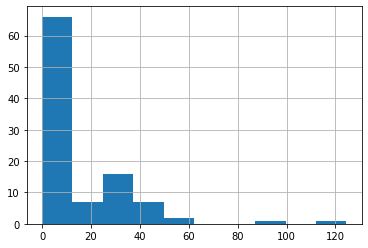

In [17]:
#to confirm lets plot the first 100 rows histogram
newdf['TimeDiff'].head(100).hist()

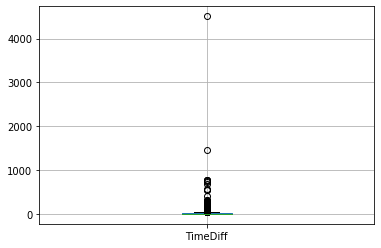

In [18]:
#lets see the boxplot to confirm
newdf.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [19]:
#so we have two points, one where TimeDiff>1000 and one >4000
#lets see those rows
newdf[newdf['TimeDiff']>1000]

,TimeDiff
47552,4509.180556
62293,1450.866389


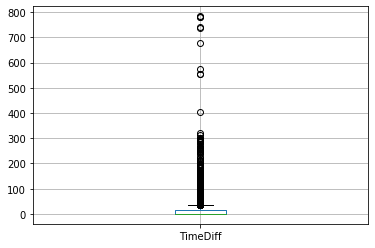

In [20]:
#lets skip them and see the boxplot
subset = newdf[(newdf.index != 47552) & (newdf.index != 62293)]
subset.count()

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')
#still we see that there are problems...ie some orders are taking too long for approval..

TimeDiff    98627
dtype: int64


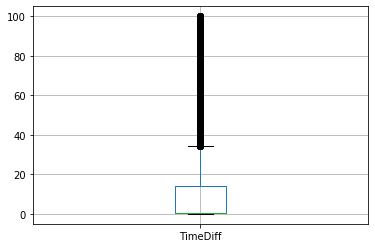

In [21]:
subset = newdf[newdf['TimeDiff']<100]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    91969
dtype: int64


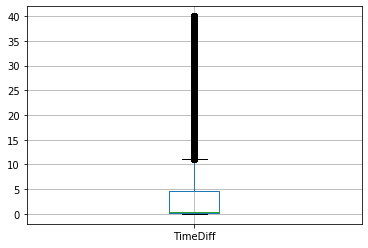

In [22]:
#lets do it once more with 40
subset = newdf[newdf['TimeDiff']<40]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

TimeDiff    63424
dtype: int64


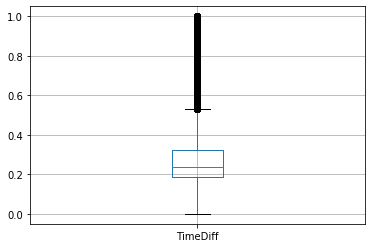

In [23]:
#lets do it once more with 40
subset = newdf[newdf['TimeDiff']<1]
print(subset.count())

subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [24]:
#let us try to find out how many rows are above 40
subset = newdf[newdf['TimeDiff']>40]
print(subset.count())

#so these all can be considered as sort of outliers.. but the way the orders are being processed needs to be drilled down
#i guess this has to do with different products.

TimeDiff    7312
dtype: int64


# So what I did was I randomly tried various subset range of dataset to consider in making boxplot while using the subset.count() as a criteria that I have the greatest count with lowest number of outliers in the boxplot.
# The histogram helped me pick up the subset range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E9E4666C8>]],
      dtype=object)

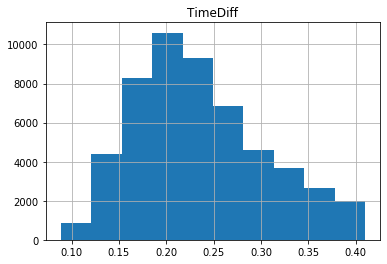

In [25]:
subset = newdf[(newdf['TimeDiff']<=0.41) & (newdf['TimeDiff']>0)]
subset.hist()

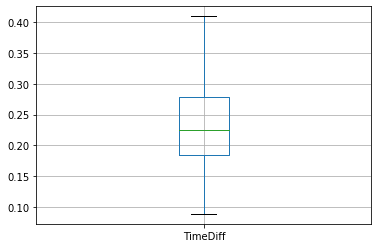

In [26]:
subset.boxplot(column='TimeDiff', sym='o', return_type='axes')

In [27]:

subset.count()

TimeDiff    53204
dtype: int64